In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import ast
import warnings

warnings.filterwarnings("ignore")

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


# Load datasets
templates = pd.read_csv("preprocessed/HDFS.log_templates.csv")
event_traces = pd.read_csv("preprocessed/Event_traces.csv")
event_matrix = pd.read_csv("preprocessed/Event_occurrence_matrix.csv")

# Basic statistics
print(f"Total blocks: {len(event_traces)}")
print(f"Columns in traces: {event_traces.columns.tolist()}")
print(f"\nLabel distribution:")
print(event_traces["Label"].value_counts())

Total blocks: 575061
Columns in traces: ['BlockId', 'Label', 'Type', 'Features', 'TimeInterval', 'Latency']

Label distribution:
Label
Success    558223
Fail        16838
Name: count, dtype: int64


Normal blocks: 558223
Anomaly blocks: 0
Anomaly rate: 0.00%


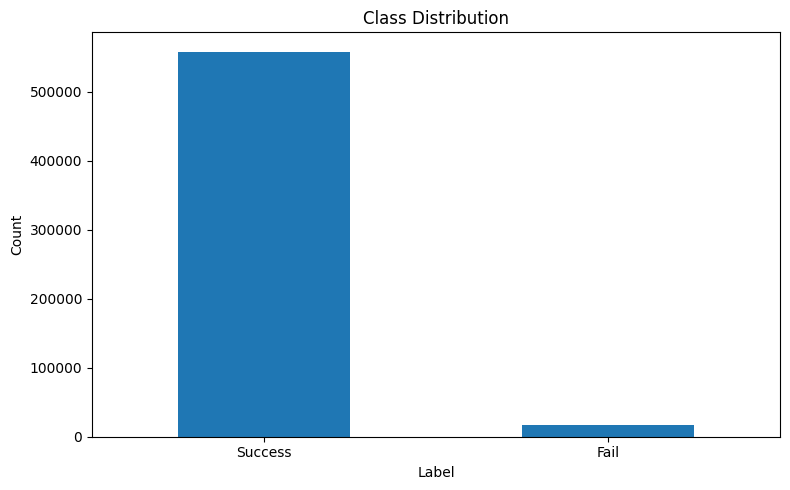

In [3]:
# Check class distribution
label_counts = event_traces["Label"].value_counts()
anomaly_rate = label_counts.get("Anomaly", 0) / len(event_traces) * 100

print(f"Normal blocks: {label_counts.get('Success', 0)}")
print(f"Anomaly blocks: {label_counts.get('Anomaly', 0)}")
print(f"Anomaly rate: {anomaly_rate:.2f}%")

# Visualization
plt.figure(figsize=(8, 5))
label_counts.plot(kind="bar")
plt.title("Class Distribution")
plt.ylabel("Count")
plt.xlabel("Label")
plt.xticks(rotation=0)
plt.tight_layout()

In [5]:
# Event occurrence matrix analysis
event_cols = [col for col in event_matrix.columns if col.startswith("E")]

# Top events by frequency
event_sums = event_matrix[event_cols].sum().sort_values(ascending=False)
print("\nTop 10 most frequent events:")
print(event_sums.head(10))

# Event distribution by label
normal_events = event_matrix[event_matrix["Label"] == "Success"][event_cols].sum()
anomaly_events = event_matrix[event_matrix["Label"] == "Anomaly"][event_cols].sum()

# Chi-square test for event significance
from scipy.stats import chi2_contingency

for event in event_cols:
    contingency_table = pd.crosstab(event_matrix["Label"], event_matrix[event] > 0)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value < 0.001:
        print(f"{event}: Highly significant (p={p_value:.4e})")


Top 10 most frequent events:
E5     1723232
E26    1719741
E11    1706679
E9     1706514
E21    1402047
E23    1396174
E22     575061
E3      428726
E4      356207
E2      120036
dtype: int64
E1: Highly significant (p=7.5017e-31)
E2: Highly significant (p=3.9877e-16)
E3: Highly significant (p=3.4803e-13)
E4: Highly significant (p=5.3516e-30)
E6: Highly significant (p=0.0000e+00)
E7: Highly significant (p=0.0000e+00)
E8: Highly significant (p=0.0000e+00)
E9: Highly significant (p=0.0000e+00)
E10: Highly significant (p=0.0000e+00)
E11: Highly significant (p=0.0000e+00)
E12: Highly significant (p=4.0103e-182)
E13: Highly significant (p=0.0000e+00)
E14: Highly significant (p=0.0000e+00)
E15: Highly significant (p=1.3933e-268)
E16: Highly significant (p=0.0000e+00)
E17: Highly significant (p=1.2608e-59)
E18: Highly significant (p=0.0000e+00)
E19: Highly significant (p=1.0936e-23)
E20: Highly significant (p=0.0000e+00)
E21: Highly significant (p=0.0000e+00)
E23: Highly significant (p=0.0000

Loading datasets...
✓ Loaded 29 event templates
✓ Loaded 575061 event traces
✓ Loaded 575061 event occurrence records

STARTING COMPREHENSIVE HDFS DATA EXPLORATION

EVENT TEMPLATE ANALYSIS

Total Event Types: 29

Event IDs: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, E15, E16, E17, E18, E19, E20, E21, E22, E23, E24, E25, E26, E27, E28, E29

--- Sample Templates ---
E1: [*]Adding an already existing block[*]
E2: [*]Verification succeeded for[*]
E3: [*]Served block[*]to[*]
E4: [*]Got exception while serving[*]to[*]
E5: [*]Receiving block[*]src:[*]dest:[*]
E6: [*]Received block[*]src:[*]dest:[*]of size[*]
E7: [*]writeBlock[*]received exception[*]
E8: [*]PacketResponder[*]for block[*]Interrupted[*]
E9: [*]Received block[*]of size[*]from[*]
E10: [*]PacketResponder[*]Exception[*]

CLASS DISTRIBUTION ANALYSIS

Total Traces: 575061
Success: 558223 (97.07%)
Fail: 16838 (2.93%)

Imbalance Ratio: 33.15:1

✓ Saved: class_distribution.png


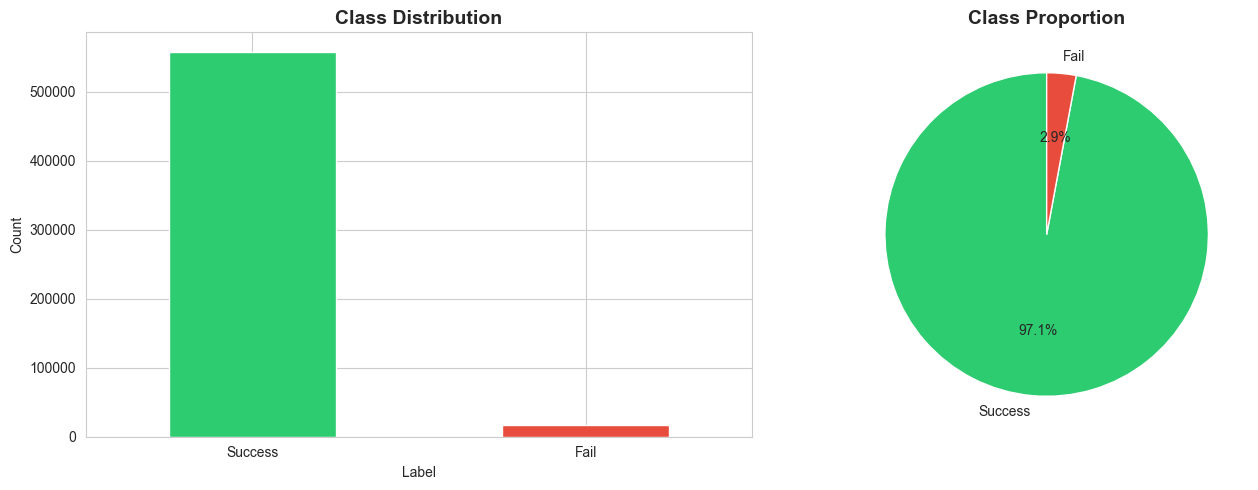


SEQUENCE ANALYSIS

--- Sequence Length Statistics ---
count    575061.000000
mean         19.433815
std           5.177735
min           2.000000
25%          19.000000
50%          19.000000
75%          20.000000
max         298.000000
Name: sequence_length, dtype: float64

--- By Label ---
            count       mean        std   min   25%   50%   75%    max
Label                                                                 
Fail      16838.0  17.119017  12.409644   2.0   4.0  20.0  26.0  284.0
Success  558223.0  19.503637   4.775583  13.0  19.0  19.0  20.0  298.0

✓ Saved: sequence_analysis.png


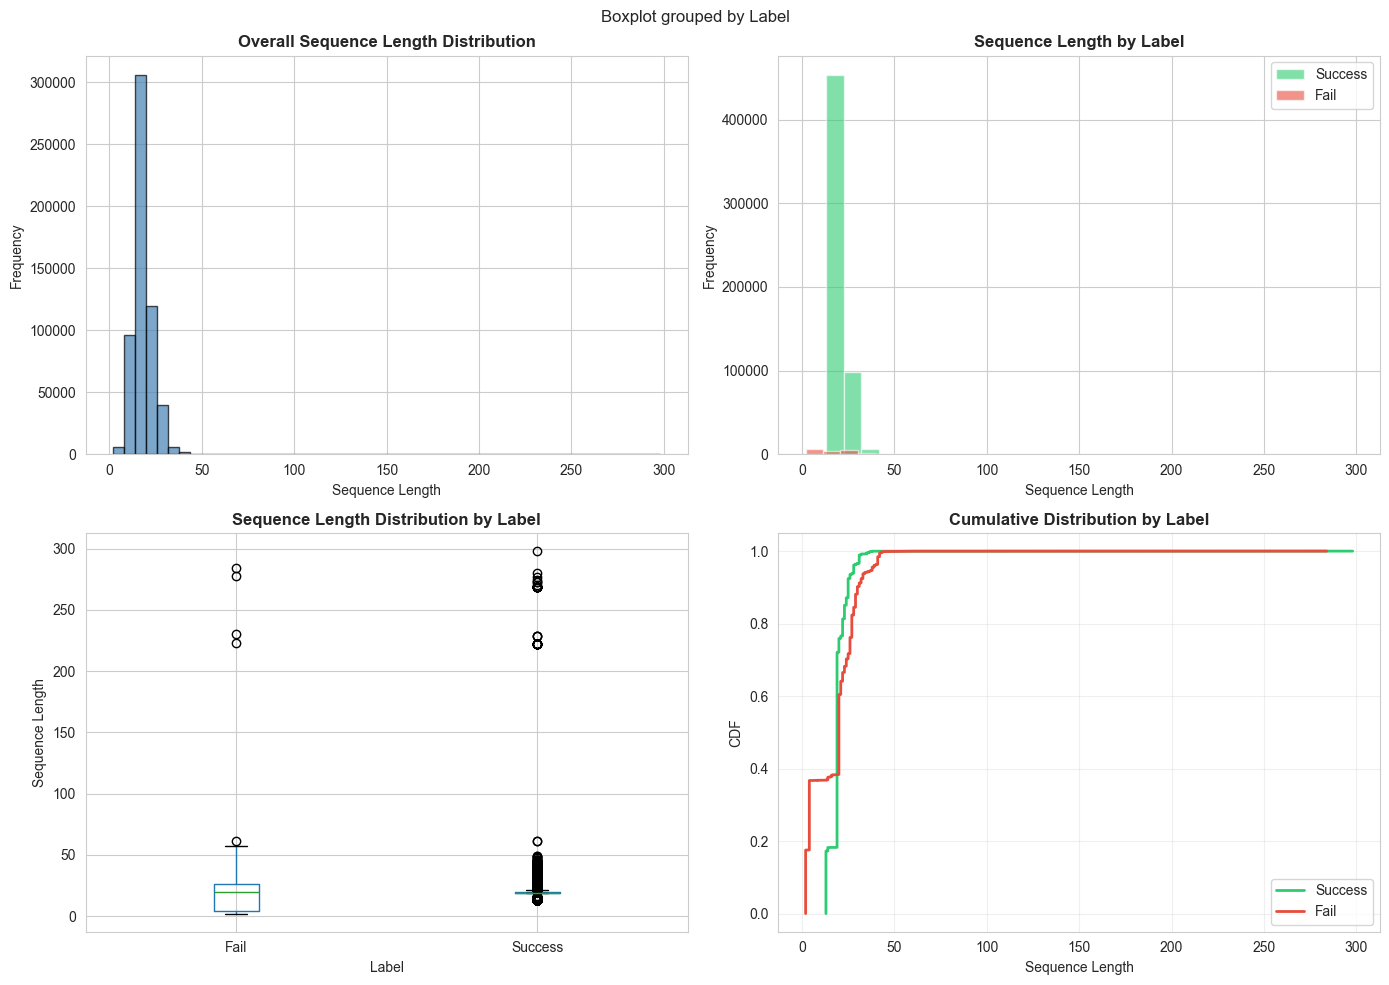


EVENT DISTRIBUTION ANALYSIS

--- Top 10 Most Frequent Events ---
E5: 1,723,232 occurrences
E26: 1,719,741 occurrences
E11: 1,706,679 occurrences
E9: 1,706,514 occurrences
E21: 1,402,047 occurrences
E23: 1,396,174 occurrences
E22: 575,061 occurrences
E3: 428,726 occurrences
E4: 356,207 occurrences
E2: 120,036 occurrences

--- Event Frequency by Label ---

Success - Top 5 Events:
  E26: 1,679,485
  E5: 1,677,287
  E11: 1,674,669
  E9: 1,674,669
  E21: 1,366,574

Fail - Top 5 Events:
  E5: 45,945
  E26: 40,256
  E21: 35,473
  E11: 32,010
  E23: 31,923

--- Statistically Significant Events (p < 0.001) ---
E6: p-value = 0.00e+00
E7: p-value = 0.00e+00
E8: p-value = 0.00e+00
E9: p-value = 0.00e+00
E10: p-value = 0.00e+00
E11: p-value = 0.00e+00
E13: p-value = 0.00e+00
E14: p-value = 0.00e+00
E16: p-value = 0.00e+00
E18: p-value = 0.00e+00

✓ Saved: event_distribution.png


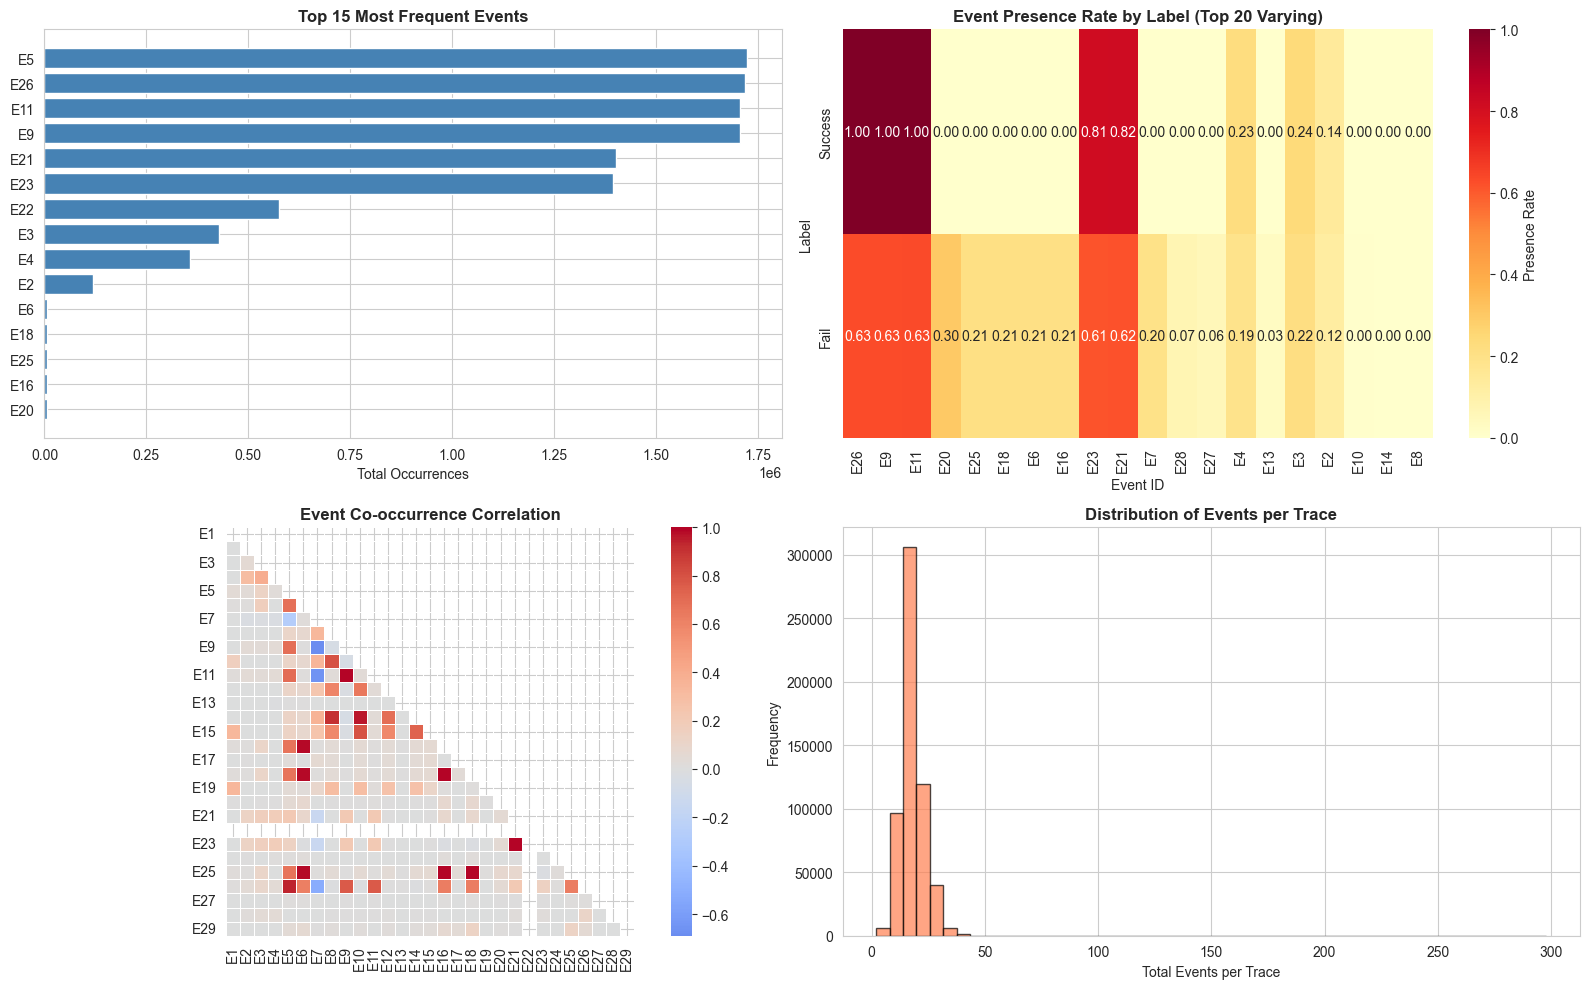


TEMPORAL ANALYSIS

--- Overall Statistics ---
             Latency
count  575061.000000
mean    16789.470527
std     17886.993688
min         0.000000
25%      1144.000000
50%      7229.000000
75%     33680.000000
max     54025.000000

--- By Label ---
          Latency                                                            \
            count          mean           std  min     25%     50%      75%   
Label                                                                         
Fail      16838.0  14089.464960  18376.636894  0.0     3.0  4920.5  31717.5   
Success  558223.0  16870.912341  17865.694194  0.0  1241.0  7303.0  33732.0   

                  
             max  
Label             
Fail     53924.0  
Success  54025.0  

--- Statistical Significance (Mann-Whitney U Test) ---


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
"""
HDFS Log Anomaly Detection - Initial Data Exploration
This script performs comprehensive exploratory data analysis on HDFS dataset
"""


class HDFSExplorer:
    def __init__(self):
        self.templates = None
        self.event_traces = None
        self.event_matrix = None

    def load_data(self, templates_path, traces_path=None, matrix_path=None):
        """Load all available dataset files"""
        print("Loading datasets...")
        self.templates = pd.read_csv(templates_path)
        print(f"✓ Loaded {len(self.templates)} event templates")

        if traces_path:
            self.event_traces = pd.read_csv(traces_path)
            print(f"✓ Loaded {len(self.event_traces)} event traces")

        if matrix_path:
            self.event_matrix = pd.read_csv(matrix_path)
            print(f"✓ Loaded {len(self.event_matrix)} event occurrence records")

    def explore_templates(self):
        """Analyze event templates"""
        print("\n" + "=" * 70)
        print("EVENT TEMPLATE ANALYSIS")
        print("=" * 70)

        print(f"\nTotal Event Types: {len(self.templates)}")
        print(f"\nEvent IDs: {', '.join(self.templates['EventId'].values)}")

        print("\n--- Sample Templates ---")
        for idx, row in self.templates.head(10).iterrows():
            template = row["EventTemplate"]
            truncated = template[:80] + "..." if len(template) > 80 else template
            print(f"{row['EventId']}: {truncated}")

    def explore_class_distribution(self):
        """Analyze label distribution and class imbalance"""
        if self.event_traces is None:
            print("Event traces not loaded. Skipping class distribution analysis.")
            return

        print("\n" + "=" * 70)
        print("CLASS DISTRIBUTION ANALYSIS")
        print("=" * 70)

        label_counts = self.event_traces["Label"].value_counts()
        total = len(self.event_traces)

        print(f"\nTotal Traces: {total}")
        for label, count in label_counts.items():
            percentage = (count / total) * 100
            print(f"{label}: {count} ({percentage:.2f}%)")

        # Calculate imbalance ratio
        if len(label_counts) > 1:
            majority = label_counts.max()
            minority = label_counts.min()
            imbalance_ratio = majority / minority
            print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # Bar chart
        label_counts.plot(kind="bar", ax=ax1, color=["#2ecc71", "#e74c3c"])
        ax1.set_title("Class Distribution", fontsize=14, fontweight="bold")
        ax1.set_ylabel("Count")
        ax1.set_xlabel("Label")
        ax1.tick_params(axis="x", rotation=0)

        # Pie chart
        colors = ["#2ecc71", "#e74c3c"]
        ax2.pie(
            label_counts.values,
            labels=label_counts.index,
            autopct="%1.1f%%",
            colors=colors,
            startangle=90,
        )
        ax2.set_title("Class Proportion", fontsize=14, fontweight="bold")

        plt.tight_layout()
        plt.savefig("class_distribution.png", dpi=300, bbox_inches="tight")
        print("\n✓ Saved: class_distribution.png")
        plt.show()

    def explore_sequences(self):
        """Analyze sequence characteristics"""
        if self.event_traces is None:
            print("Event traces not loaded. Skipping sequence analysis.")
            return

        print("\n" + "=" * 70)
        print("SEQUENCE ANALYSIS")
        print("=" * 70)

        # Parse sequences - handle both string and list formats
        def parse_sequence(x):
            if isinstance(x, str):
                try:
                    return ast.literal_eval(x)
                except:
                    # If literal_eval fails, split by comma
                    return [item.strip() for item in x.strip("[]").split(",")]
            elif isinstance(x, list):
                return x
            else:
                return []

        self.event_traces["event_sequence"] = self.event_traces["Features"].apply(
            parse_sequence
        )
        self.event_traces["sequence_length"] = self.event_traces[
            "event_sequence"
        ].apply(len)

        print("\n--- Sequence Length Statistics ---")
        print(self.event_traces["sequence_length"].describe())

        print("\n--- By Label ---")
        stats_by_label = self.event_traces.groupby("Label")[
            "sequence_length"
        ].describe()
        print(stats_by_label)

        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # Overall distribution
        axes[0, 0].hist(
            self.event_traces["sequence_length"],
            bins=50,
            color="steelblue",
            alpha=0.7,
            edgecolor="black",
        )
        axes[0, 0].set_title("Overall Sequence Length Distribution", fontweight="bold")
        axes[0, 0].set_xlabel("Sequence Length")
        axes[0, 0].set_ylabel("Frequency")

        # By label
        labels = self.event_traces["Label"].unique()
        colors = ["#2ecc71", "#e74c3c"]

        for idx, label in enumerate(labels):
            data = self.event_traces[self.event_traces["Label"] == label][
                "sequence_length"
            ]
            axes[0, 1].hist(
                data, bins=30, alpha=0.6, label=label, color=colors[idx % len(colors)]
            )
        axes[0, 1].set_title("Sequence Length by Label", fontweight="bold")
        axes[0, 1].set_xlabel("Sequence Length")
        axes[0, 1].set_ylabel("Frequency")
        axes[0, 1].legend()

        # Box plot comparison
        self.event_traces.boxplot(column="sequence_length", by="Label", ax=axes[1, 0])
        axes[1, 0].set_title("Sequence Length Distribution by Label", fontweight="bold")
        axes[1, 0].set_xlabel("Label")
        axes[1, 0].set_ylabel("Sequence Length")
        plt.sca(axes[1, 0])
        plt.xticks(rotation=0)

        # CDF comparison
        for idx, label in enumerate(labels):
            data = sorted(
                self.event_traces[self.event_traces["Label"] == label][
                    "sequence_length"
                ]
            )
            cdf = np.arange(1, len(data) + 1) / len(data)
            axes[1, 1].plot(
                data, cdf, label=label, linewidth=2, color=colors[idx % len(colors)]
            )
        axes[1, 1].set_title("Cumulative Distribution by Label", fontweight="bold")
        axes[1, 1].set_xlabel("Sequence Length")
        axes[1, 1].set_ylabel("CDF")
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig("sequence_analysis.png", dpi=300, bbox_inches="tight")
        print("\n✓ Saved: sequence_analysis.png")
        plt.show()

    def explore_event_distribution(self):
        """Analyze event occurrence patterns"""
        if self.event_matrix is None:
            print("Event matrix not loaded. Skipping event distribution analysis.")
            return

        print("\n" + "=" * 70)
        print("EVENT DISTRIBUTION ANALYSIS")
        print("=" * 70)

        event_cols = [col for col in self.event_matrix.columns if col.startswith("E")]

        # Overall event frequency
        event_sums = self.event_matrix[event_cols].sum().sort_values(ascending=False)

        print("\n--- Top 10 Most Frequent Events ---")
        for event, count in event_sums.head(10).items():
            print(f"{event}: {count:,} occurrences")

        # Event frequency by label
        print("\n--- Event Frequency by Label ---")
        for label in self.event_matrix["Label"].unique():
            label_data = self.event_matrix[self.event_matrix["Label"] == label]
            label_events = label_data[event_cols].sum().sort_values(ascending=False)
            print(f"\n{label} - Top 5 Events:")
            for event, count in label_events.head(5).items():
                print(f"  {event}: {count:,}")

        # Statistical significance testing
        print("\n--- Statistically Significant Events (p < 0.001) ---")
        significant_events = []

        for event in event_cols:
            contingency_table = pd.crosstab(
                self.event_matrix["Label"], self.event_matrix[event] > 0
            )
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            if p_value < 0.001:
                significant_events.append((event, p_value))

        significant_events.sort(key=lambda x: x[1])
        for event, p_val in significant_events[:10]:
            print(f"{event}: p-value = {p_val:.2e}")

        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))

        # Overall event frequency
        top_events = event_sums.head(15)
        axes[0, 0].barh(range(len(top_events)), top_events.values, color="steelblue")
        axes[0, 0].set_yticks(range(len(top_events)))
        axes[0, 0].set_yticklabels(top_events.index)
        axes[0, 0].set_xlabel("Total Occurrences")
        axes[0, 0].set_title("Top 15 Most Frequent Events", fontweight="bold")
        axes[0, 0].invert_yaxis()

        # Heatmap of event presence by label
        labels = self.event_matrix["Label"].unique()
        event_presence = pd.DataFrame()
        for label in labels:
            label_data = self.event_matrix[self.event_matrix["Label"] == label]
            presence = (label_data[event_cols] > 0).mean()
            event_presence[label] = presence

        top_varying_events = (
            event_presence.var(axis=1).sort_values(ascending=False).head(20).index
        )
        sns.heatmap(
            event_presence.loc[top_varying_events].T,
            annot=True,
            fmt=".2f",
            cmap="YlOrRd",
            ax=axes[0, 1],
            cbar_kws={"label": "Presence Rate"},
        )
        axes[0, 1].set_title(
            "Event Presence Rate by Label (Top 20 Varying)", fontweight="bold"
        )
        axes[0, 1].set_xlabel("Event ID")
        axes[0, 1].set_ylabel("Label")

        # Event co-occurrence heatmap
        event_corr = self.event_matrix[event_cols].corr()
        mask = np.triu(np.ones_like(event_corr, dtype=bool))
        sns.heatmap(
            event_corr,
            mask=mask,
            cmap="coolwarm",
            center=0,
            ax=axes[1, 0],
            square=True,
            linewidths=0.5,
        )
        axes[1, 0].set_title("Event Co-occurrence Correlation", fontweight="bold")

        # Events per trace distribution
        events_per_trace = self.event_matrix[event_cols].sum(axis=1)
        axes[1, 1].hist(
            events_per_trace, bins=50, color="coral", alpha=0.7, edgecolor="black"
        )
        axes[1, 1].set_xlabel("Total Events per Trace")
        axes[1, 1].set_ylabel("Frequency")
        axes[1, 1].set_title("Distribution of Events per Trace", fontweight="bold")

        plt.tight_layout()
        plt.savefig("event_distribution.png", dpi=300, bbox_inches="tight")
        print("\n✓ Saved: event_distribution.png")
        plt.show()

    def explore_temporal_features(self):
        """Analyze temporal patterns"""
        if self.event_traces is None:
            print("Event traces not loaded. Skipping temporal analysis.")
            return

        print("\n" + "=" * 70)
        print("TEMPORAL ANALYSIS")
        print("=" * 70)

        temporal_cols = ["TimeInterval", "Latency"]

        print("\n--- Overall Statistics ---")
        print(self.event_traces[temporal_cols].describe())

        print("\n--- By Label ---")
        temporal_by_label = self.event_traces.groupby("Label")[temporal_cols].describe()
        print(temporal_by_label)

        # Statistical tests
        from scipy.stats import mannwhitneyu

        labels = self.event_traces["Label"].unique()
        if len(labels) == 2:
            print("\n--- Statistical Significance (Mann-Whitney U Test) ---")
            for col in temporal_cols:
                group1 = self.event_traces[self.event_traces["Label"] == labels[0]][col]
                group2 = self.event_traces[self.event_traces["Label"] == labels[1]][col]
                stat, p_value = mannwhitneyu(group1, group2, alternative="two-sided")
                print(f"{col}: U-statistic = {stat:.2f}, p-value = {p_value:.2e}")

        # Visualization
        fig, axes = plt.subplots(2, 3, figsize=(16, 10))

        # TimeInterval distributions
        for idx, label in enumerate(self.event_traces["Label"].unique()):
            data = self.event_traces[self.event_traces["Label"] == label][
                "TimeInterval"
            ]
            axes[0, 0].hist(data, bins=30, alpha=0.6, label=label)
        axes[0, 0].set_xlabel("TimeInterval")
        axes[0, 0].set_ylabel("Frequency")
        axes[0, 0].set_title("TimeInterval Distribution", fontweight="bold")
        axes[0, 0].legend()

        # Latency distributions
        for idx, label in enumerate(self.event_traces["Label"].unique()):
            data = self.event_traces[self.event_traces["Label"] == label]["Latency"]
            axes[0, 1].hist(data, bins=30, alpha=0.6, label=label)
        axes[0, 1].set_xlabel("Latency")
        axes[0, 1].set_ylabel("Frequency")
        axes[0, 1].set_title("Latency Distribution", fontweight="bold")
        axes[0, 1].legend()

        # Scatter plot
        for idx, label in enumerate(self.event_traces["Label"].unique()):
            data = self.event_traces[self.event_traces["Label"] == label]
            axes[0, 2].scatter(
                data["TimeInterval"], data["Latency"], alpha=0.5, label=label, s=10
            )
        axes[0, 2].set_xlabel("TimeInterval")
        axes[0, 2].set_ylabel("Latency")
        axes[0, 2].set_title("TimeInterval vs Latency", fontweight="bold")
        axes[0, 2].legend()

        # Box plots
        self.event_traces.boxplot(column="TimeInterval", by="Label", ax=axes[1, 0])
        axes[1, 0].set_title("TimeInterval by Label", fontweight="bold")
        axes[1, 0].set_xlabel("Label")
        plt.sca(axes[1, 0])
        plt.xticks(rotation=0)

        self.event_traces.boxplot(column="Latency", by="Label", ax=axes[1, 1])
        axes[1, 1].set_title("Latency by Label", fontweight="bold")
        axes[1, 1].set_xlabel("Label")
        plt.sca(axes[1, 1])
        plt.xticks(rotation=0)

        # Violin plot
        import matplotlib.patches as mpatches

        positions = []
        data_to_plot = []
        colors_list = []
        color_map = {"Anomaly": "#e74c3c", "Success": "#2ecc71"}

        for idx, label in enumerate(self.event_traces["Label"].unique()):
            data = self.event_traces[self.event_traces["Label"] == label]["Latency"]
            positions.append(idx)
            data_to_plot.append(data)
            colors_list.append(color_map.get(label, "steelblue"))

        parts = axes[1, 2].violinplot(
            data_to_plot, positions=positions, showmeans=True, showmedians=True
        )

        for pc, color in zip(parts["bodies"], colors_list):
            pc.set_facecolor(color)
            pc.set_alpha(0.7)

        axes[1, 2].set_xticks(positions)
        axes[1, 2].set_xticklabels(self.event_traces["Label"].unique())
        axes[1, 2].set_ylabel("Latency")
        axes[1, 2].set_title("Latency Distribution (Violin Plot)", fontweight="bold")

        plt.tight_layout()
        plt.savefig("temporal_analysis.png", dpi=300, bbox_inches="tight")
        print("\n✓ Saved: temporal_analysis.png")
        plt.show()

    def generate_summary_report(self):
        """Generate comprehensive summary report"""
        print("\n" + "=" * 70)
        print("COMPREHENSIVE SUMMARY REPORT")
        print("=" * 70)

        report = {
            "dataset_info": {},
            "class_distribution": {},
            "sequence_stats": {},
            "temporal_stats": {},
            "recommendations": [],
        }

        # Dataset info
        if self.templates is not None:
            report["dataset_info"]["num_event_types"] = len(self.templates)

        if self.event_traces is not None:
            report["dataset_info"]["num_traces"] = len(self.event_traces)

            # Class distribution
            label_counts = self.event_traces["Label"].value_counts()
            for label, count in label_counts.items():
                report["class_distribution"][label] = {
                    "count": int(count),
                    "percentage": float(count / len(self.event_traces) * 100),
                }

            # Imbalance ratio
            if len(label_counts) > 1:
                majority = label_counts.max()
                minority = label_counts.min()
                report["class_distribution"]["imbalance_ratio"] = float(
                    majority / minority
                )

            # Sequence stats
            if "sequence_length" in self.event_traces.columns:
                report["sequence_stats"]["mean_length"] = float(
                    self.event_traces["sequence_length"].mean()
                )
                report["sequence_stats"]["median_length"] = float(
                    self.event_traces["sequence_length"].median()
                )
                report["sequence_stats"]["max_length"] = int(
                    self.event_traces["sequence_length"].max()
                )

            # Temporal stats
            if "TimeInterval" in self.event_traces.columns:
                report["temporal_stats"]["mean_time_interval"] = float(
                    self.event_traces["TimeInterval"].mean()
                )
                report["temporal_stats"]["mean_latency"] = float(
                    self.event_traces["Latency"].mean()
                )

        # Generate recommendations
        if "imbalance_ratio" in report["class_distribution"]:
            ratio = report["class_distribution"]["imbalance_ratio"]
            if ratio > 10:
                report["recommendations"].append(
                    "High class imbalance detected. Consider using: "
                    "(1) SMOTE or oversampling, (2) Class weights in model, "
                    "(3) Focal loss"
                )

        if "max_length" in report["sequence_stats"]:
            max_len = report["sequence_stats"]["max_length"]
            if max_len > 500:
                report["recommendations"].append(
                    f"Long sequences detected (max: {max_len}). "
                    "Consider: (1) Truncation/padding strategy, "
                    "(2) Hierarchical models, (3) Attention mechanisms"
                )

        report["recommendations"].append(
            "Recommended models: LSTM, Transformer, or CNN for sequence analysis"
        )
        report["recommendations"].append(
            "Use stratified k-fold cross-validation due to class imbalance"
        )
        report["recommendations"].append(
            "Monitor precision, recall, F1-score, and AUC-ROC for evaluation"
        )

        # Print summary
        print("\n### DATASET OVERVIEW ###")
        print(f"Event Types: {report['dataset_info'].get('num_event_types', 'N/A')}")
        print(f"Total Traces: {report['dataset_info'].get('num_traces', 'N/A')}")

        print("\n### CLASS DISTRIBUTION ###")
        for label, stats in report["class_distribution"].items():
            if label != "imbalance_ratio":
                print(f"{label}: {stats['count']} ({stats['percentage']:.2f}%)")
        if "imbalance_ratio" in report["class_distribution"]:
            print(
                f"Imbalance Ratio: {report['class_distribution']['imbalance_ratio']:.2f}:1"
            )

        print("\n### SEQUENCE CHARACTERISTICS ###")
        for key, value in report["sequence_stats"].items():
            print(f"{key.replace('_', ' ').title()}: {value:.2f}")

        print("\n### TEMPORAL CHARACTERISTICS ###")
        for key, value in report["temporal_stats"].items():
            print(f"{key.replace('_', ' ').title()}: {value:.2f}")

        print("\n### RECOMMENDATIONS ###")
        for idx, rec in enumerate(report["recommendations"], 1):
            print(f"{idx}. {rec}")

        # Save report to JSON
        import json

        with open("hdfs_exploration_report.json", "w") as f:
            json.dump(report, f, indent=2)
        print("\n✓ Saved: hdfs_exploration_report.json")

        return report

    def run_complete_analysis(self):
        """Run all exploration steps"""
        print("\n" + "=" * 70)
        print("STARTING COMPREHENSIVE HDFS DATA EXPLORATION")
        print("=" * 70)

        self.explore_templates()
        self.explore_class_distribution()
        self.explore_sequences()
        self.explore_event_distribution()
        self.explore_temporal_features()
        report = self.generate_summary_report()

        print("\n" + "=" * 70)
        print("EXPLORATION COMPLETE!")
        print("=" * 70)
        print("\nGenerated files:")
        print("  - class_distribution.png")
        print("  - sequence_analysis.png")
        print("  - event_distribution.png")
        print("  - temporal_analysis.png")
        print("  - hdfs_exploration_report.json")

        return report


# Main execution
if __name__ == "__main__":
    # Initialize explorer
    explorer = HDFSExplorer()

    # Load data (adjust paths as needed)
    explorer.load_data(
        templates_path="preprocessed/HDFS.log_templates.csv",
        traces_path="preprocessed/Event_traces.csv",  # Optional if you have it
        matrix_path="preprocessed/Event_occurrence_matrix.csv",  # Optional if you have it
    )

    # Run complete analysis
    report = explorer.run_complete_analysis()

    print("\n✓ Ready for deep learning implementation!")
    print("  Next steps: Train LSTM/Transformer models")
    print("  Focus on: Precision, Recall, MTTD, MTTR metrics")